# **GUÍA SOBRE TÉCNICAS DE IMPUTACIÓN DE DATOS CON PYTHON**

Las personas que trabajan en el campo de la ciencia de datos comprenden la importancia de los datos, los datos son el recurso para impulsar un modelo de aprendizaje automático.La mayoría de los algoritmos de Machine Learning esperan conjuntos de datos completos y limpios sin ningun tipo de ruido o perturbación; desafortunadamente, los conjuntos de datos del mundo real son desordenados, se encuentran en diferentes escalas de medición y siempre existen los conocidos valores faltantes, es por ello que el manejo de datos faltantes se vuelve muy importante para realizar un correcto análisis como cientíticos de datos.

*   https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation
*   https://ichi.pro/es/una-guia-rapida-sobre-tecnicas-de-imputacion-de-datos-faltantes-en-python-2020-92431787695134
*   https://machinelearningmastery.com/handle-missing-data-python/

En este tutorial, descubrirá cómo manejar los datos faltantes para el aprendizaje automático con Python:



*   Seleccionar valores perdidos en su conjunto de datos.
*   Eliminar valores perdidos en su conjunto de datos.
*   Imputar valores perdidos con técnicas de imputación simple y múltiple.





## Conjunto de datos a trabajar: **Brewer's Friend Beer Recipes**

Este es un conjunto de datos de 75,000 cervezas caseras con más de 176 estilos diferentes. Los registros de cerveza son informados por los usuarios y se clasifican de acuerdo con uno de los 176 estilos diferentes. Estas recetas tienen tanto o tan poco detalle como las proporcionó el usuario, pero hay al menos 5 columnas útiles donde se ingresaron datos para cada una: Original Gravity, Final Gravity, ABV, IBU, and Color

https://www.kaggle.com/jtrofe/beer-recipes

## (1) Cargando librerías necesarias

In [2]:
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador

## (2) Cargamos nuestro set de datos a trabajar

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
df = pd.read_csv('/gdrive/MyDrive/04. PROYECTOS/02. DATA SCIENCE Files/01. Publicaciones/03. Imputación de datos/data/recipeData.csv',encoding='latin-1')
print(df.shape)
df.head(5)

(73861, 23)


,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


## (3) Análisis inicial: Análisis Exploratorio de datos

In [5]:
# Entendiendo nuestro set de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         73861 non-null  int64  
 1   Name           73860 non-null  object 
 2   URL            73861 non-null  object 
 3   Style          73265 non-null  object 
 4   StyleID        73861 non-null  int64  
 5   Size(L)        73861 non-null  float64
 6   OG             73861 non-null  float64
 7   FG             73861 non-null  float64
 8   ABV            73861 non-null  float64
 9   IBU            73861 non-null  float64
 10  Color          73861 non-null  float64
 11  BoilSize       73861 non-null  float64
 12  BoilTime       73861 non-null  int64  
 13  BoilGravity    70871 non-null  float64
 14  Efficiency     73861 non-null  float64
 15  MashThickness  43997 non-null  float64
 16  SugarScale     73861 non-null  object 
 17  BrewMethod     73861 non-null  object 
 18  PitchR

In [6]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
df.describe()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,36931.000000,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,21321.978453,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,18466.000000,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,36931.000000,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,55396.000000,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,73861.000000,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


In [7]:
# explorando la cantidad de valores perdidos en las variables
df.isna().sum()/df.shape[0]*100

BeerID            0.000000
Name              0.001354
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.839550
PrimingAmount    93.536508
UserId           68.358132
dtype: float64

Un vistazo inicial nos muestra que existen variables con mucha información faltante como son las variables MashThickness, PitchRate, PrimaryTemp,PrimingMethod, PrimingAmount. Más adelante se analizará las casuísticas de imputación que se pueden seguir para este tipo de tratamientos.

Ahora se trabajará con el paquete missingno para tratamiento y visualización de datos. Este tutorial no busca profundizar en esta herramienta pero para el que quiera hacerlo les dejo un enlace con mas detalles de este paquete:
https://analyticsindiamag.com/tutorial-on-missingno-python-tool-to-visualize-missing-values/

**Matrix missing:** Mostramos una matriz de calor para visualizar las variables con mayor presencia de valores perdidos. Las líneas blancas indican los valores faltantes en cada columna.

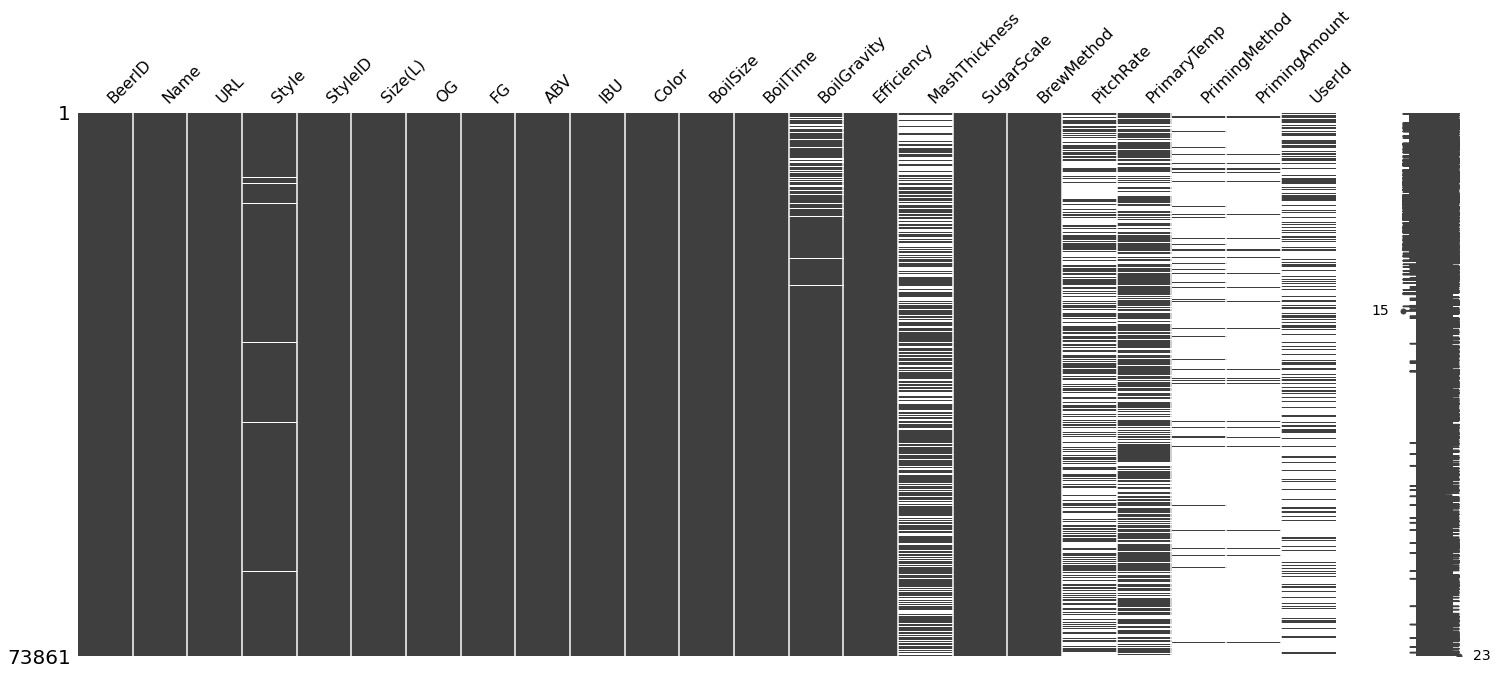

In [8]:
# matrix missing
msno.matrix(df)

**heatmap missing cor:** El mapa de calor muestra una correlación positiva con el azul. Cuanto más oscuro sea el tono de azul, mayor será la correlación.


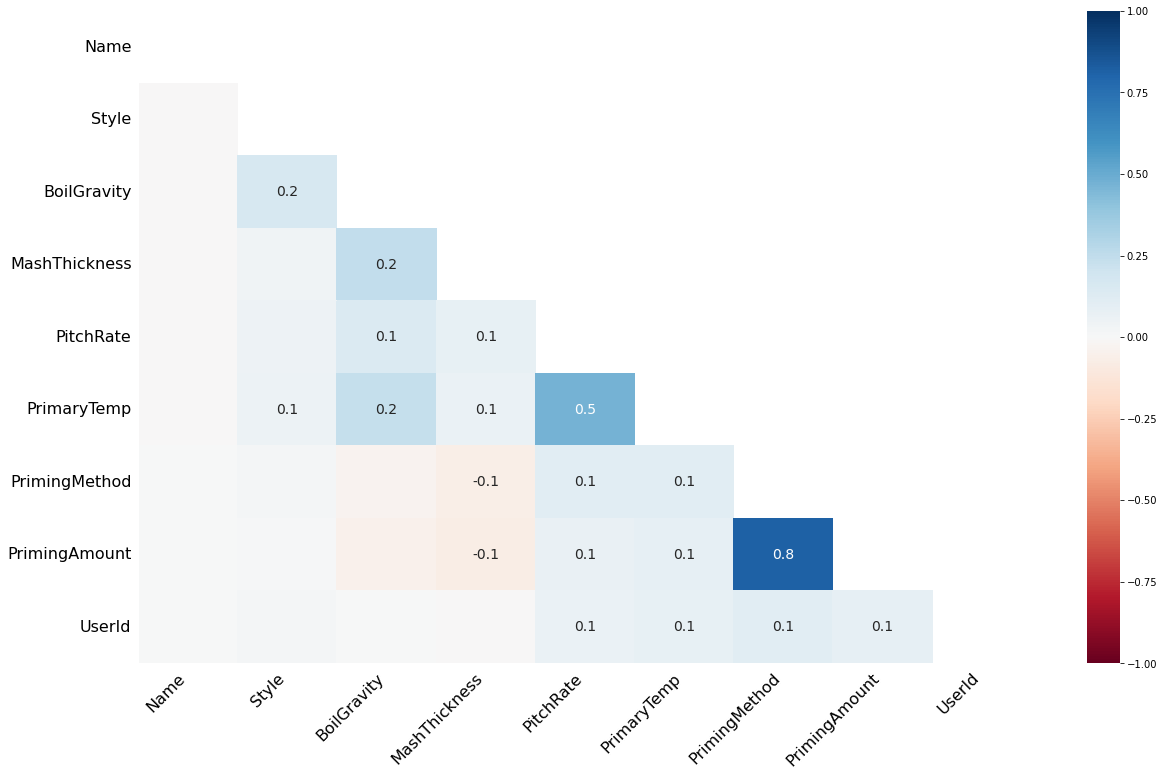

In [9]:
# heatmap missing
msno.heatmap(df)

**bar missing:** Otra forma de visualizar los datos de los valores perdidos es mediante el uso de gráficos de barras. Estas barras muestran los valores que son proporcionales a los datos que no faltan en el conjunto de datos. Junto con eso, también se muestra el número de valores que faltan.

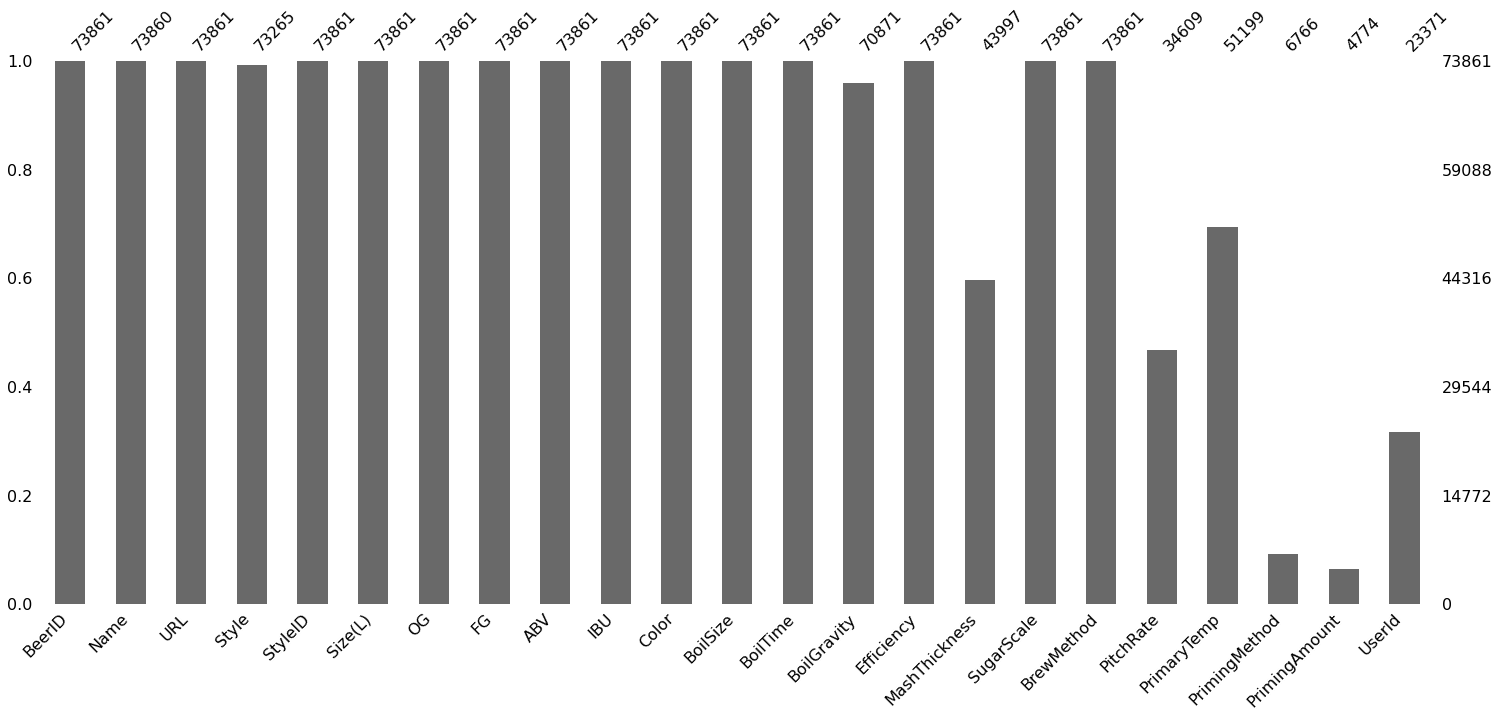

In [10]:
# bar missing
msno.bar(df)

## (4) Técnicas de imputación de datos

Hay dos clases amplias de datos faltantes: datos que faltan al azar y datos que faltan no al azar. Al considerar qué hacer con nuestros datos debemos tener esto en cuenta.

### (4.1) Técnicas de Imputación Univariada

Existen varias técnicas de imputación simple que permite realizar estimaciones acertadas y sin muchas complicaciones

a) Eliminar valores perdidos

El enfoque más fácil y rápido para un problema de datos faltantes es eliminar las entradas infractoras. Esta es una solución aceptable si estamos seguros de que los datos faltantes en el conjunto de datos faltan al azar, y si el número de puntos de datos a los que tenemos acceso es lo suficientemente alto como para que descartar algunos de ellos no nos haga perder la generalización en los modelos. construimos (para determinar si este es el caso o no, use una curva de aprendizaje).

In [11]:
df_imput01 = df.dropna() # hacemos una copia de nuestra base de datos

# Comparamos nuestra data original vs la data reducida luego de la imputación
print('nro de filas originales:',df.shape[0])
print('nro de filas imput01:',df_imput01.shape[0])
print('% de pérdida:',(df_imput01.shape[0]/df.shape[0])*100)

nro de filas originales: 73861
nro de filas imput01: 757
% de pérdida: 1.0248981194405709


Se puede observar que este primer método no es muy recomendable porque perdemos casi la totalidad de nuestra información por tratar de conservar todas las variables. En este caso lo mas recomendable es descartar estas variables con gran cantidad de valores perdidos que no aportan a nuestro análisis.

Las variables con gran presencia de valores perdidos son: 

MashThickness, PitchRate, PrimaryTemp,PrimingMethod, PrimingAmount,UserId.


In [12]:
df_imput02 = df.drop(['MashThickness', 'PitchRate', 'PrimaryTemp','PrimingMethod', 'PrimingAmount','UserId'], axis=1)
df_imput02 = df_imput02.dropna()

# Comparamos nuestra data original vs la data reducida luego de la imputación
print('nro de filas originales:',df.shape[0], '/ nro de variables originales:',df.shape[1])
print('nro de filas imput02:',df_imput02.shape[0],'/ nro de variables imput02:',df_imput02.shape[1])
print('% de pérdida:',(df_imput02.shape[0]/df.shape[0])*100)

nro de filas originales: 73861 / nro de variables originales: 23
nro de filas imput02: 70516 / nro de variables imput02: 17
% de pérdida: 95.47122297288149


b) Métodos de imputación: Media o mediana u otra sustitución estadística de resumen.

El método de imputación más simple es reemplazar los valores perdidos con los valores medios o medianos del conjunto de datos en general, o alguna estadística de resumen similar. Esto tiene la ventaja de ser el enfoque más simple posible y uno que no introduce ningún sesgo indebido en el conjunto de datos.

[Sin embargo] con valores perdidos que no son estrictamente aleatorios, especialmente en presencia de una gran desigualdad en el número de valores perdidos para las diferentes variables, el método de sustitución de medias puede conducir a un sesgo inconsistente. Además, este enfoque no agrega información nueva, solo aumenta el tamaño de la muestra y conduce a una subestimación de los errores. Por tanto, la sustitución de medias no se acepta generalmente.

In [13]:
df_imput03 = df # Copiamos nuestra base de datos para probar técnicas de imputación de datos
df_imput03.isnull().sum()/df_imput03.shape[0]

BeerID           0.000000
Name             0.000014
URL              0.000000
Style            0.008069
StyleID          0.000000
Size(L)          0.000000
OG               0.000000
FG               0.000000
ABV              0.000000
IBU              0.000000
Color            0.000000
BoilSize         0.000000
BoilTime         0.000000
BoilGravity      0.040481
Efficiency       0.000000
MashThickness    0.404327
SugarScale       0.000000
BrewMethod       0.000000
PitchRate        0.531431
PrimaryTemp      0.306820
PrimingMethod    0.908395
PrimingAmount    0.935365
UserId           0.683581
dtype: float64

Seleccionamos la variable 'MashThickness' para imputar sus valores perdidos.

In [14]:
df_imput03['MashThickness_imput_1'] = df_imput03['MashThickness'].fillna( df_imput03['MashThickness'].mean()) # Imputando los valores perdidos por la media
df_imput03['MashThickness_imput_2'] = df_imput03['MashThickness'].fillna( df_imput03['MashThickness'].median()) # Imputando los valores perdidos por la mediana

In [15]:
df_imput03[['MashThickness','MashThickness_imput_1','MashThickness_imput_2']].describe() 

,MashThickness,MashThickness_imput_1,MashThickness_imput_2
count,43997.000000,73861.000000,73861.000000
mean,2.127235,2.127235,1.873627
std,1.682347,1.298427,1.334417
min,0.000000,0.000000,0.000000
25%,1.500000,1.500000,1.500000
50%,1.500000,2.127235,1.500000
75%,3.000000,2.127235,1.530000
max,100.000000,100.000000,100.000000


In [ ]:
#df['MashThickness'].isnull().sum(), df['MashThickness'].fillna(df['MashThickness'].mean()).isnull().sum()

In [ ]:
#df['MashThickness'].mean(), df['MashThickness'].fillna(df['MashThickness'].mean()).mean()

### (4.2) Técnicas de Imputación Multivariada

La imputación simple puede ser muy práctica pero poco util al no considerar la relación entre las variables. Los conjuntos de datos multivariados son conjuntos de datos que tienen más de dos variables o columnas de características por observación.

a) IterativeImputer:

En IterativeImpute, cada característica con un valor perdido se usa como una función de otras características con salida conocida y modela la función para imputaciones.

Luego, el mismo proceso se itera en un bucle para algunas iteraciones y en cada paso, se selecciona una columna de características como salida y y otras columnas de características se tratan como entradas X , luego se ajusta un regresor en (X, y) para y conocidas y se utiliza para predecir los valores perdidos de y . El mismo proceso se repite para cada columna de características en un ciclo y se toma el promedio de todos los valores de regresión múltiple para imputar los valores faltantes para los puntos de datos.

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [17]:
imp = IterativeImputer(max_iter=10, random_state=0)

Se consideran las variables: 
BoilGravity
MashThickness
PitchRate
PrimaryTemp

Como ideales para imputación por estar en rangos aceptables de pérdida.

In [18]:
# Seleccionamos variables a imputar
df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp']].isnull().sum()/df.shape[0]

BoilGravity      0.040481
MashThickness    0.404327
PitchRate        0.531431
PrimaryTemp      0.306820
dtype: float64

In [19]:
# Realizamos la imputación multivariada de regresión
df_imput04 = df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp']]
df_imput04 = imp.fit_transform(df_imput04)
df_imput04 = pd.DataFrame(df_imput04, columns=['BoilGravity_04','MashThickness_04','PitchRate_04','PrimaryTemp_04'])
print(df_imput04.shape)
df_imput04.head()

(73861, 4)


,BoilGravity_04,MashThickness_04,PitchRate_04,PrimaryTemp_04
0,1.03800,2.109174,0.787929,17.780000
1,1.07000,2.115609,0.745746,19.168395
2,1.35392,2.126836,0.746674,19.169536
3,1.35392,2.126836,0.746674,19.169536
4,1.05000,2.114192,0.750808,19.000000


### (4.3) Técnicas de Imputación con Modelos de Machine Learning

Podemos corregir los valores faltantes aplicando el aprendizaje automático a nuestro conjunto de datos. Podemos considerar una columna con datos faltantes como nuestra variable de destino, y columnas existentes con datos completos como nuestras variables predictoras, entonces podemos construir un modelo de aprendizaje automático utilizando registros completos como nuestros conjuntos de datos de entrenamiento y prueba y los registros con datos incompletos como nuestra generalización

a) KNNImputer:

KNNImputer es una técnica de imputación de datos multivariantes que se utiliza para completar los valores faltantes mediante el enfoque K-Neighbors Neighbors . Cada valor faltante se completa con el valor medio de los n vecinos más cercanos encontrados en el conjunto de entrenamiento, ponderados o no ponderados.

Si a una muestra le falta más de una característica, entonces el vecino para esa muestra puede ser diferente y si el número de vecinos es menor que n_neighbour especificado, entonces no hay una distancia definida en el conjunto de entrenamiento , el promedio de ese conjunto de entrenamiento se usa durante la imputación.

In [21]:
#pip install missingpy

     |████████████████████████████████| 49 kB 4.5 MB/s 


In [43]:
from missingpy import KNNImputer

In [44]:
imp_knn = KNNImputer(n_neighbors=2,weights="uniform")

In [ ]:
df_imput05 = df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp']]
df_imput05 = imp_knn.fit_transform(df_imput05)

df_imput05 = pd.DataFrame(df_imput05, columns=['BoilGravity_05','MashThickness_05','PitchRate_05','PrimaryTemp_05'])
print(df_imput05.shape)
df_imput05.head()

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))
/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:135: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)
/usr/local/lib/python3.7/dist-packages/missingpy/pairwise_external.py:138: FutureWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  warn_on_dtype=warn_on_dtype, estimator=estimator)


b) MissForest:

Es otra técnica que se utiliza para completar los valores faltantes utilizando Random Forest de forma iterada. La columna candidata se selecciona del conjunto de todas las columnas que tienen el menor número de valores perdidos .

En el primer paso, todas las demás columnas, es decir, las columnas no candidatas que tienen valores perdidos, se rellenan con la media de las columnas numéricas y el modo de las columnas categóricas y, a continuación, el imputador ajusta un modelo de bosque aleatorio con las columnas candidatas como variable de resultado ( variable de destino) y las columnas restantes como variables independientes y luego llenando los valores faltantes en la columna candidata utilizando las predicciones del modelo de bosque aleatorio ajustado.

Luego, el imputador avanza y se selecciona la siguiente columna candidata con el segundo menor número de valores perdidos y el proceso se repite para cada columna con los valores perdidos.

In [23]:
from missingpy import MissForest

In [24]:
imp_forest = MissForest(max_iter=2)

In [25]:
df_imput06 = df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp']]
df_imput06 = imp_forest.fit_transform(df_imput06)

df_imput06 = pd.DataFrame(df_imput06, columns=['BoilGravity_05','MashThickness_05','PitchRate_05','PrimaryTemp_05'])
print(df_imput06.shape)
df_imput06.head()

Iteration: 0
Iteration: 1
(73861, 4)


,BoilGravity_05,MashThickness_05,PitchRate_05,PrimaryTemp_05
0,1.038000,1.340140,0.737036,17.780000
1,1.070000,1.850500,0.687667,19.030775
2,1.235298,1.320000,0.550500,16.658851
3,1.235298,1.320000,0.550500,16.658851
4,1.050000,3.033975,0.785311,19.000000


para validar que las distribuciones se mantienen.

In [42]:
pd.merge(df[['BoilGravity','MashThickness','PitchRate','PrimaryTemp']],df_imput06,left_index=True, right_index=True).describe()

,BoilGravity,MashThickness,PitchRate,PrimaryTemp,BoilGravity_05,MashThickness_05,PitchRate_05,PrimaryTemp_05
count,70871.000000,43997.000000,34609.000000,51199.000000,73861.000000,73861.000000,73861.000000,73861.000000
mean,1.353955,2.127235,0.750468,19.175641,1.348937,2.098626,0.740183,19.141531
std,1.930989,1.682347,0.394262,4.219676,1.892370,1.445886,0.307884,3.633447
min,0.000000,0.000000,0.000000,-17.780000,0.000000,0.000000,0.000000,-17.780000
25%,1.040000,1.500000,0.350000,18.000000,1.040000,1.465740,0.523233,18.330000
50%,1.047000,1.500000,0.750000,20.000000,1.048000,1.534073,0.732297,19.440000
75%,1.060000,3.000000,1.000000,20.000000,1.063000,2.766198,0.859942,20.000000
max,52.600000,100.000000,2.000000,114.000000,52.600000,100.000000,2.000000,114.000000
